PLOT Europa's orbit around Jupiter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice

In [2]:
import sys

# import SPICE user lib
sys.path.append('../lib/')
import clipper_spice_lib as clipper_lib
import juice_spice_lib as juice_lib

In [3]:
# load SPICE ketnels
source_dir = '/Users/Shared/spice/clipper/kernels/'
clipper_lib.spice_ini(source_dir)

In [4]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = int(24*365*3.6)  # number of data
dt = 3600    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_JUPITER', tar='EUROPA', org='JUPITER', x_ref='SUN', corr='LT+S')

Calculate orbital phase angle

In [5]:
import scipy

ind = scipy.signal.argrelmax(r)
npnt = len(ind[0][:])
phase = np.zeros(nd)
for i in range(npnt-1):
    nn = len(r[ind[0][i]:ind[0][i+1]])
    for j in range(nn):
        phase[ind[0][i]+j] = float(j)/float(nn)*360.0

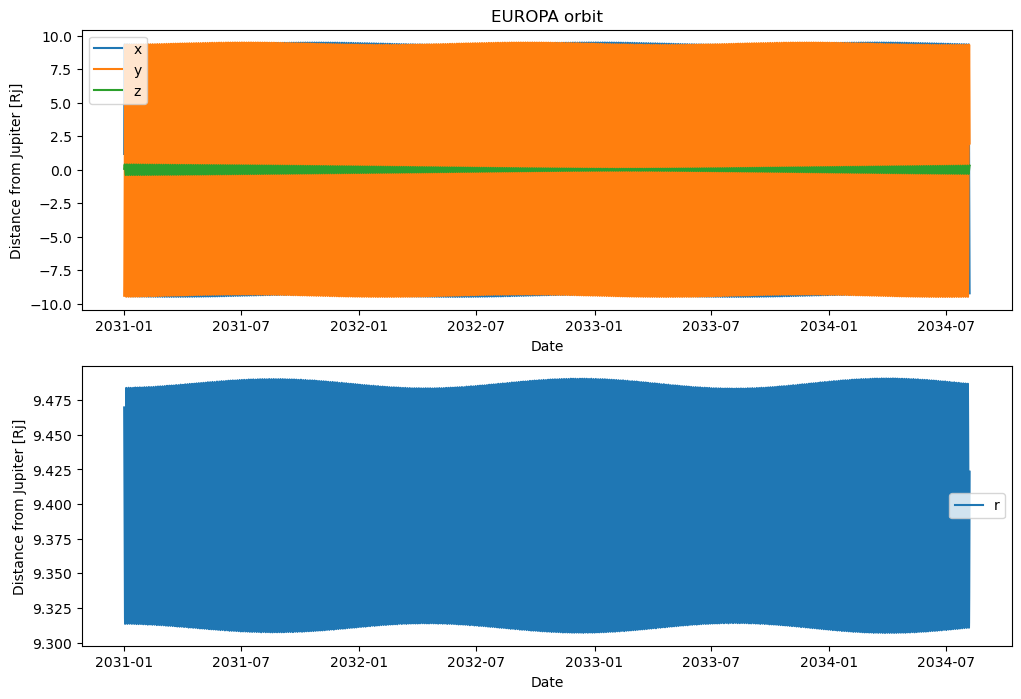

In [6]:
rj = 71400.0  # [km]
td = spice.et2datetime(et)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12.0, 8.0))

ax1.plot(td, x/rj, label='x')
ax1.plot(td, y/rj, label='y')
ax1.plot(td, z/rj, label='z')
ax1.set_title('EUROPA orbit')
ax1.set_xlabel('Date')
ax1.set_ylabel('Distance from Jupiter [Rj]')
ax1.legend()

ax2.plot(td, r/rj, label='r')
ax2.set_xlabel('Date')
ax2.set_ylabel('Distance from Jupiter [Rj]')
ax2.legend()


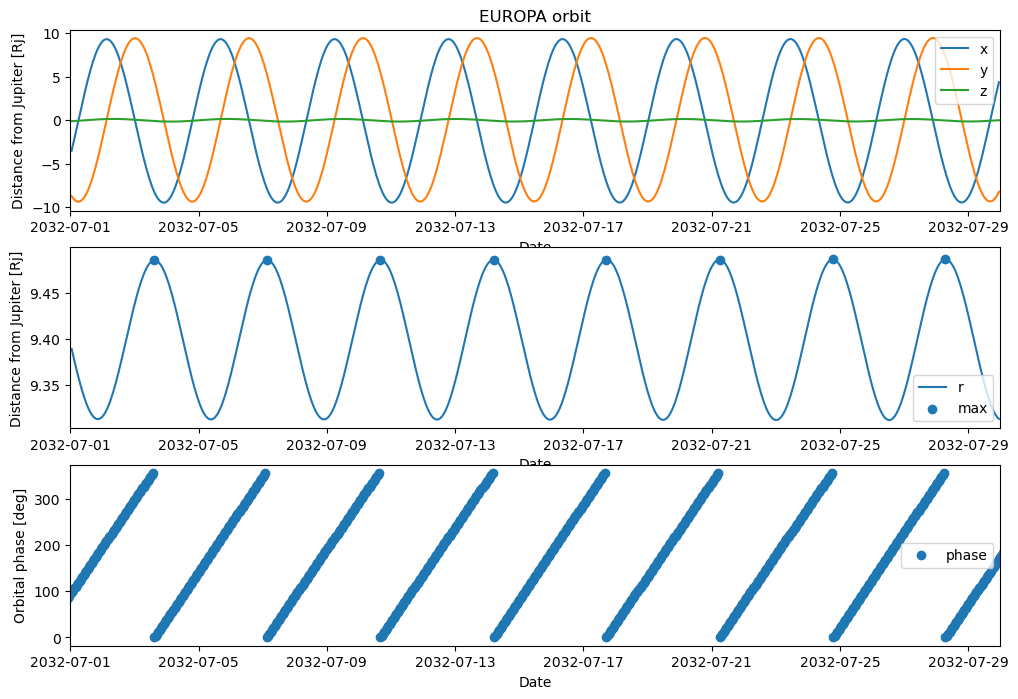

In [8]:
utctim1 = '2032-07-01T00:00:00'
utctim2 = '2032-07-30T00:00:00'
#utctim1 = '2031-07-07T00:00:00'
#utctim2 = '2031-07-11T00:00:00'
td1 = spice.et2datetime(spice.str2et(utctim1))
td2 = spice.et2datetime(spice.str2et(utctim2))
index = np.where((td>td1) & (td<td2))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12.0, 8.0))

ax1.plot(td[index], x[index]/rj, label='x')
ax1.plot(td[index], y[index]/rj, label='y')
ax1.plot(td[index], z[index]/rj, label='z')
ax1.set_xlim(td1,td2)
ax1.set_title('EUROPA orbit')
ax1.set_xlabel('Date')
ax1.set_ylabel('Distance from Jupiter [Rj]')
ax1.legend()

ax2.plot(td[index], r[index]/rj, label='r')
ax2.scatter(td[ind], r[ind]/rj, label='max')
ax2.set_xlim(td1,td2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Distance from Jupiter [Rj]')
ax2.legend()

ax3.scatter(td, phase, label='phase')
ax3.set_xlim(td1,td2)
ax3.set_xlabel('Date')
ax3.set_ylabel('Orbital phase [deg]')
ax3.legend()
